## All you need is ♥️… And a pet!

Some of you didn't get any flower on Valentine's day but you worry not, Jerry has a solution for you. Get ready to adopt a pet!

<img src="img/dataset-cover.jpg" width="920">

Here we are going to build a classifier to predict whether an animal from an animal shelter will be adopted or not (aac_intakes_outcomes.csv, available at: https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-intakes-and-outcomes/version/1#aac_intakes_outcomes.csv). You will be working with the following features:

1. *animal_type:* Type of animal. May be one of 'cat', 'dog', 'bird', etc.
2. *intake_year:* Year of intake
3. *intake_condition:* The intake condition of the animal. Can be one of 'normal', 'injured', 'sick', etc.
4. *intake_number:* The intake number denoting the number of occurrences the animal has been brought into the shelter. Values higher than 1 indicate the animal has been taken into the shelter on more than one occasion.
5. *intake_type:* The type of intake, for example, 'stray', 'owner surrender', etc.
6. *sex_upon_intake:* The gender of the animal and if it has been spayed or neutered at the time of intake
7. *age_upon\_intake_(years):* The age of the animal upon intake represented in years
8. *time_in_shelter_days:* Numeric value denoting the number of days the animal remained at the shelter from intake to outcome.
9. *sex_upon_outcome:* The gender of the animal and if it has been spayed or neutered at time of outcome
10. *age_upon\_outcome_(years):* The age of the animal upon outcome represented in years
11. *outcome_type:* The outcome type. Can be one of ‘adopted’, ‘transferred’, etc.

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from itertools import combinations 
import ast
from sklearn.linear_model import LogisticRegression
import seaborn as sn
%matplotlib inline

data_folder = './data/'

### A) Load the dataset and convert categorical features to a suitable numerical representation (use dummy-variable encoding). 
- Split the data into a training set (80%) and a test set (20%). Pair each feature vector with the corresponding label, i.e., whether the outcome_type is adoption or not. 
- Standardize the values of each feature in the data to have mean 0 and variance 1.

The use of external libraries is not permitted in part A, except for numpy and pandas. 
If you notice missing values in the imported entries, you have to deal with them. Make informed choices.

In [48]:
columns = ['animal_type', 'intake_year', 'intake_condition', 'intake_number', 'intake_type', 'sex_upon_intake', \
          'age_upon_intake_(years)', 'time_in_shelter_days', 'sex_upon_outcome', 'age_upon_outcome_(years)', \
          'outcome_type']
original_data = pd.read_csv(data_folder+'aac_intakes_outcomes.csv', usecols=columns)

In [49]:
display(original_data.head(5))

,outcome_type,sex_upon_outcome,age_upon_outcome_(years),animal_type,intake_condition,intake_type,sex_upon_intake,age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days
0,Return to Owner,Neutered Male,10.0,Dog,Normal,Stray,Neutered Male,10.0,2017,1.0,0.588194
1,Return to Owner,Neutered Male,7.0,Dog,Normal,Public Assist,Neutered Male,7.0,2014,2.0,1.259722
2,Return to Owner,Neutered Male,6.0,Dog,Normal,Public Assist,Neutered Male,6.0,2014,3.0,1.113889
3,Transfer,Neutered Male,10.0,Dog,Normal,Owner Surrender,Neutered Male,10.0,2014,1.0,4.970139
4,Return to Owner,Neutered Male,16.0,Dog,Injured,Public Assist,Neutered Male,16.0,2013,1.0,0.119444


In [50]:

print('The length of the data with all rows is : {}'.format(len(original_data)))
original_data.dropna(inplace=True)
print('The length of the data without the rows with nan value is: {}'.format(len(original_data)))

The length of the data with all rows is : 79672
The length of the data without the rows with nan value is: 79661


In [51]:
display(original_data['outcome_type'].value_counts())

outcome_type
Adoption           33594
Transfer           23799
Return to Owner    14790
Euthanasia          6244
Died                 690
Disposal             304
Rto-Adopt            179
Missing               46
Relocate              15
Name: count, dtype: int64

If adoption put 1 if not put 0

In [52]:
data = original_data.copy()
data['label'] = data['outcome_type'].apply(lambda x: 1 if x == 'Adoption' else 0)
data.drop(columns=['outcome_type'], inplace=True)
display(data['label'].value_counts())

label
0    46067
1    33594
Name: count, dtype: int64

In [53]:
categorical_columns = ['animal_type', 'intake_condition', 'intake_type', 'sex_upon_intake', 'sex_upon_outcome']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
display(data.head(5))
display(data.shape)

,age_upon_outcome_(years),age_upon_intake_(years),intake_year,intake_number,time_in_shelter_days,label,animal_type_Cat,animal_type_Dog,animal_type_Other,intake_condition_Feral,...,intake_type_Stray,intake_type_Wildlife,sex_upon_intake_Intact Male,sex_upon_intake_Neutered Male,sex_upon_intake_Spayed Female,sex_upon_intake_Unknown,sex_upon_outcome_Intact Male,sex_upon_outcome_Neutered Male,sex_upon_outcome_Spayed Female,sex_upon_outcome_Unknown
0,10.0,10.0,2017,1.0,0.588194,0,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
1,7.0,7.0,2014,2.0,1.259722,0,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,6.0,6.0,2014,3.0,1.113889,0,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,10.0,10.0,2014,1.0,4.970139,0,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
4,16.0,16.0,2013,1.0,0.119444,0,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False


(79661, 28)

The code below can used to split the data to training/testing. The `data_to_split` should be the clean dataframe from A)

In [54]:
data_to_split = data

def split_set(data_to_split, ratio=0.8):
    mask = np.random.rand(len(data_to_split)) < ratio
    return [data_to_split[mask].reset_index(drop=True), data_to_split[~mask].reset_index(drop=True)]

[train, test] = split_set(data_to_split)

In [55]:
display(train['label'].value_counts())
display(test['label'].value_counts())

label
0    36831
1    26910
Name: count, dtype: int64

label
0    9236
1    6684
Name: count, dtype: int64

In [56]:

numeric_cols = ['intake_year', 'intake_number', 'age_upon_intake_(years)', 'time_in_shelter_days', 'age_upon_outcome_(years)']
for col in numeric_cols:
    mean = train[col].mean()
    std = train[col].std()
    train[col] = (train[col] - mean) / std
    test[col] = (test[col] - mean) / std

In [57]:
# sanity check
print(train['intake_year'].describe())
print(test['intake_year'].describe())

count    6.374100e+04
mean    -8.726675e-14
std      1.000000e+00
min     -1.871782e+00
25%     -1.103171e+00
50%     -3.345590e-01
75%      1.202664e+00
max      1.971276e+00
Name: intake_year, dtype: float64
count    15920.000000
mean         0.003205
std          1.008005
min         -1.871782
25%         -1.103171
50%         -0.334559
75%          1.202664
max          1.971276
Name: intake_year, dtype: float64


Procedure: added binary outcome column for adoption or not, then we do one-hot encoding with drop first. Lastly, I split the data and then normalize it on the training set to avoid data leakage.

### B) Train a logistic regression classifier on your training set. Logistic regression returns probabilities as predictions, so in order to arrive at a binary prediction, you need to put a threshold on the predicted probabilities. 
- For the decision threshold of 0.5, present the performance of your classifier on the test set by displaying the confusion matrix. Based on the confusion matrix, manually calculate accuracy, precision, recall, and F1-score with respect to the positive and the negative class. 

- The features in the testing set must be matched with the traning set.

- You can use the functions below to compute and plot a confusion matrix as well as compute all relevant scores

In [60]:
def compute_confusion_matrix(true_label, prediction_proba, decision_threshold=0.5): 
    
    predict_label = (prediction_proba[:,1]>decision_threshold).astype(int)   
                                                                                                                       
    TP = np.sum(np.logical_and(predict_label==1, true_label==1))
    TN = np.sum(np.logical_and(predict_label==0, true_label==0))
    FP = np.sum(np.logical_and(predict_label==1, true_label==0))
    FN = np.sum(np.logical_and(predict_label==0, true_label==1))
    
    confusion_matrix = np.asarray([[TP, FP],
                                    [FN, TN]])
    return confusion_matrix


def plot_confusion_matrix(confusion_matrix):
    [[TP, FP],[FN, TN]] = confusion_matrix
    label = np.asarray([['TP {}'.format(TP), 'FP {}'.format(FP)],
                        ['FN {}'.format(FN), 'TN {}'.format(TN)]])
    
    df_cm = pd.DataFrame(confusion_matrix, index=['Yes', 'No'], columns=['Positive', 'Negative']) 
    
    return sn.heatmap(df_cm, cmap='YlOrRd', annot=label, annot_kws={"size": 16}, cbar=False, fmt='')


def compute_all_score(confusion_matrix, t=0.5):
    [[TP, FP],[FN, TN]] = confusion_matrix.astype(float)
    
    accuracy =  (TP+TN)/np.sum(confusion_matrix)
    
    precision_positive = TP/(TP+FP) if (TP+FP) !=0 else np.nan
    precision_negative = TN/(TN+FN) if (TN+FN) !=0 else np.nan
    
    recall_positive = TP/(TP+FN) if (TP+FN) !=0 else np.nan
    recall_negative = TN/(TN+FP) if (TN+FP) !=0 else np.nan

    F1_score_positive = 2 *(precision_positive*recall_positive)/(precision_positive+recall_positive) if (precision_positive+recall_positive) !=0 else np.nan
    F1_score_negative = 2 *(precision_negative*recall_negative)/(precision_negative+recall_negative) if (precision_negative+recall_negative) !=0 else np.nan

    return [t, accuracy, precision_positive, recall_positive, F1_score_positive, precision_negative, recall_negative, F1_score_negative]

In [ ]:
# Fit cute logistic regression
X_train = train.drop(columns=['label'])
y_train = train['label']
X_test = test.drop(columns=['label'])
y_test = test['label']

log_reg_model = LogisticRegression(max_iter=10000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [70]:
#evaluate the predictions
pred = log_reg_model.predict_proba(X_test)

def model_evaluation(t):
        
    conf_matrix = compute_confusion_matrix(y_test, pred, t)
    plot_confusion_matrix(conf_matrix)
    scores = compute_all_score(conf_matrix)

    metric_labels = [
        "Threshold",
        "Accuracy",
        "Precision (positive)",
        "Recall (positive)",
        "F1 Score (positive)",
        "Precision (negative)",
        "Recall (negative)",
        "F1 Score (negative)"
    ]

    for i in range(len(metric_labels)):
        print(metric_labels[i], ":", scores[i])

    return scores

Threshold : 0.5
Accuracy : 0.8259422110552764
Precision (positive) : 0.7750597497539716
Recall (positive) : 0.8248055056852185
F1 Score (positive) : 0.7991592375154019
Precision (negative) : 0.8670375837402067
Recall (negative) : 0.826764833261152
F1 Score (negative) : 0.8464224352934656


[0.5,
 0.8259422110552764,
 0.7750597497539716,
 0.8248055056852185,
 0.7991592375154019,
 0.8670375837402067,
 0.826764833261152,
 0.8464224352934656]

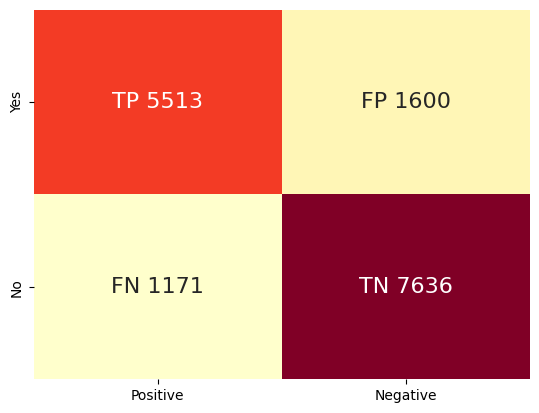

In [71]:
model_evaluation(0.5)

### C) Vary the value of the threshold in the range from 0 to 1 and visualize the value of accuracy, precision, recall  and F1-score (with respect to both classes) as a function of the threshold.

Here we expect one plot for the accuracy and then 2 sets of 3 plots for each of the classes, i.e. precision, recall and F1 score for the positive class and precision, recall and F1 score for the negative class.

### Comment on the results. What do you observe?

In clinic 3, we will focus on the AUROC curve.

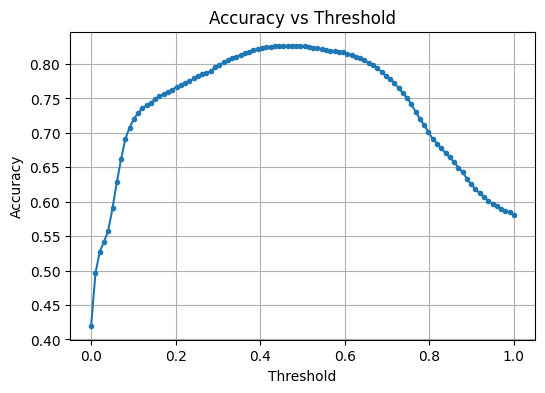

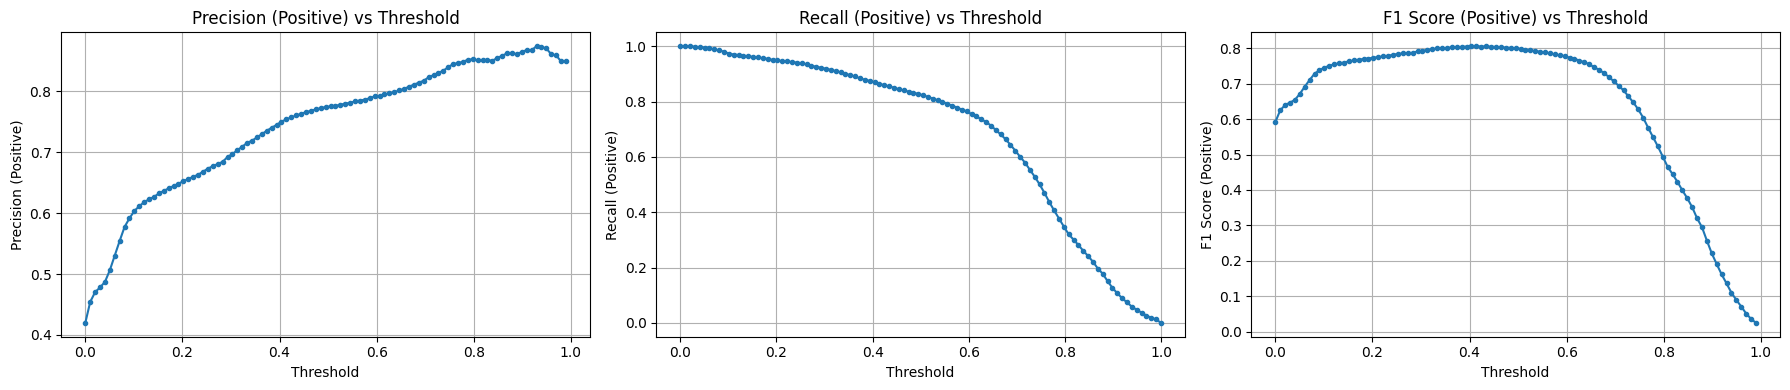

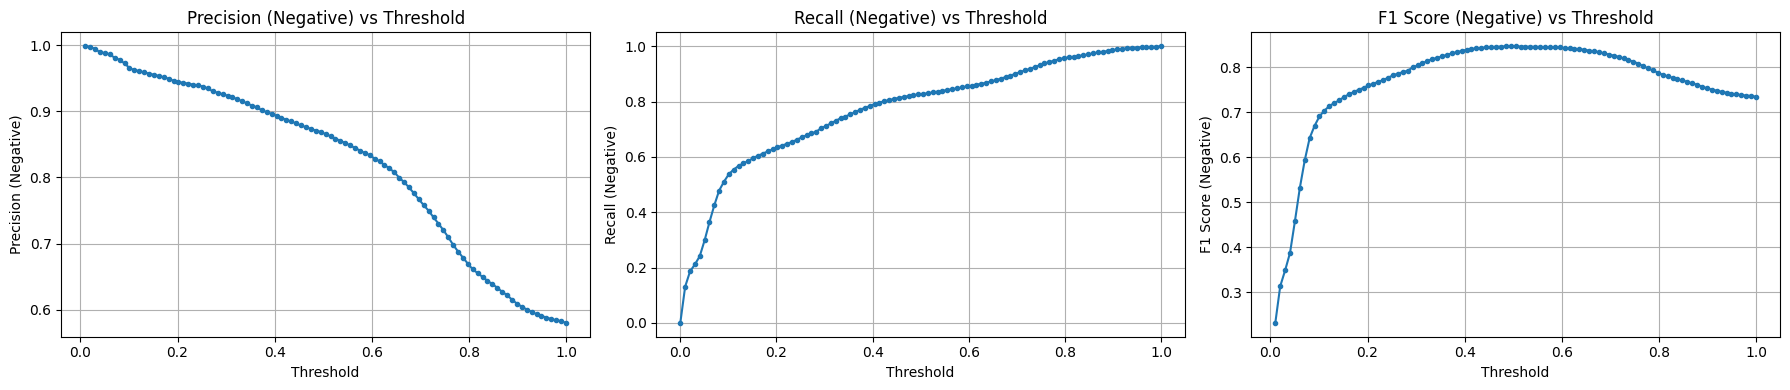

In [ ]:
#show cute plots here (in total 7 plots)

# simple function to just return the scores 
def evaluate_threshold(t):
    conf_matrix = compute_confusion_matrix(y_test, pred, t)
    scores = compute_all_score(conf_matrix)
    return scores

# Create a range of thresholds to evaluate
thresholds = np.linspace(0, 1, 100)

# Lists to hold metric values over thresholds
accuracy_list    = []
prec_pos_list    = []
recall_pos_list  = []
f1_pos_list      = []
prec_neg_list    = []
recall_neg_list  = []
f1_neg_list      = []

# Loop over thresholds and evaluate the model
for t in thresholds:
    scores = evaluate_threshold(t)
    accuracy_list.append(scores[1])
    prec_pos_list.append(scores[2])
    recall_pos_list.append(scores[3])
    f1_pos_list.append(scores[4])
    prec_neg_list.append(scores[5])
    recall_neg_list.append(scores[6])
    f1_neg_list.append(scores[7])

# Plot Accuracy vs Threshold
plt.figure(figsize=(6,4))
plt.plot(thresholds, accuracy_list, marker='o', markersize=3)
plt.title('Accuracy vs Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Plot metrics for the positive class (precision, recall, F1-score)
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
axs[0].plot(thresholds, prec_pos_list, marker='o', markersize=3)
axs[0].set_title('Precision (Positive) vs Threshold')
axs[0].set_xlabel('Threshold')
axs[0].set_ylabel('Precision (Positive)')
axs[0].grid(True)

axs[1].plot(thresholds, recall_pos_list, marker='o', markersize=3)
axs[1].set_title('Recall (Positive) vs Threshold')
axs[1].set_xlabel('Threshold')
axs[1].set_ylabel('Recall (Positive)')
axs[1].grid(True)

axs[2].plot(thresholds, f1_pos_list, marker='o', markersize=3)
axs[2].set_title('F1 Score (Positive) vs Threshold')
axs[2].set_xlabel('Threshold')
axs[2].set_ylabel('F1 Score (Positive)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

# Plot metrics for the negative class (precision, recall, F1-score)
fig, axs = plt.subplots(1, 3, figsize=(18, 4))
axs[0].plot(thresholds, prec_neg_list, marker='o', markersize=3)
axs[0].set_title('Precision (Negative) vs Threshold')
axs[0].set_xlabel('Threshold')
axs[0].set_ylabel('Precision (Negative)')
axs[0].grid(True)

axs[1].plot(thresholds, recall_neg_list, marker='o', markersize=3)
axs[1].set_title('Recall (Negative) vs Threshold')
axs[1].set_xlabel('Threshold')
axs[1].set_ylabel('Recall (Negative)')
axs[1].grid(True)

axs[2].plot(thresholds, f1_neg_list, marker='o', markersize=3)
axs[2].set_title('F1 Score (Negative) vs Threshold')
axs[2].set_xlabel('Threshold')
axs[2].set_ylabel('F1 Score (Negative)')
axs[2].grid(True)

plt.tight_layout()
plt.show()


* It seems that the accuracy peaks somewhere between 0.4 and 0.6. Notably, it seems that we can't achieve an accuracy higher than 0.85 which might be caused because of the vast class imbalance.

* For the positive class the general trend is that as the threshold increases the precision increases and recall decreases. The opposite tren is true for the negative class, which makes sense.


Threshold : 0.5
Accuracy : 0.5968592964824121
Precision (positive) : 0.8715083798882681
Recall (positive) : 0.0466786355475763
F1 Score (positive) : 0.0886111900028401
Precision (negative) : 0.5905410615602108
Recall (negative) : 0.9950194889562581
F1 Score (negative) : 0.7411888055488346


[0.5,
 0.5968592964824121,
 0.8715083798882681,
 0.0466786355475763,
 0.0886111900028401,
 0.5905410615602108,
 0.9950194889562581,
 0.7411888055488346]

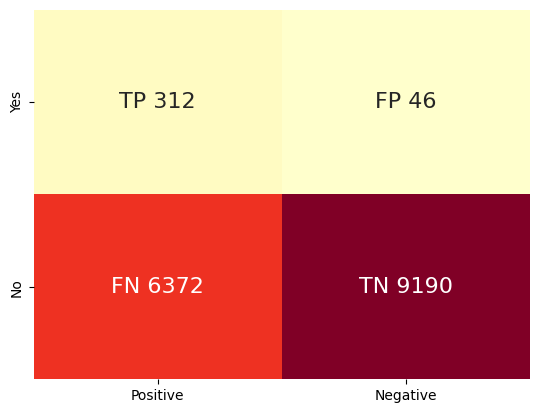

In [79]:
model_evaluation(0.95)

Threshold : 0.5
Accuracy : 0.5864949748743719
Precision (positive) : 0.8482758620689655
Recall (positive) : 0.018402154398563735
F1 Score (positive) : 0.036022843754576074
Precision (negative) : 0.5840887480190174
Recall (negative) : 0.9976180164573408
F1 Score (negative) : 0.7367958098436688


[0.5,
 0.5864949748743719,
 0.8482758620689655,
 0.018402154398563735,
 0.036022843754576074,
 0.5840887480190174,
 0.9976180164573408,
 0.7367958098436688]

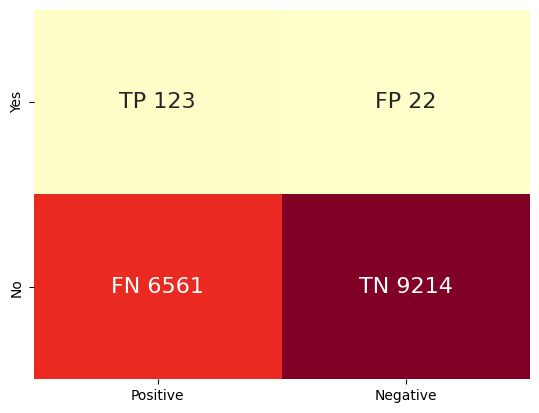

In [78]:
model_evaluation(0.98)

Threshold : 0.5
Accuracy : 0.6243718592964824
Precision (positive) : 0.8682008368200836
Recall (positive) : 0.1241771394374626
F1 Score (positive) : 0.21727748691099477
Precision (negative) : 0.6087944399893077
Recall (negative) : 0.9863577306193158
F1 Score (negative) : 0.7528925619834711


[0.5,
 0.6243718592964824,
 0.8682008368200836,
 0.1241771394374626,
 0.21727748691099477,
 0.6087944399893077,
 0.9863577306193158,
 0.7528925619834711]

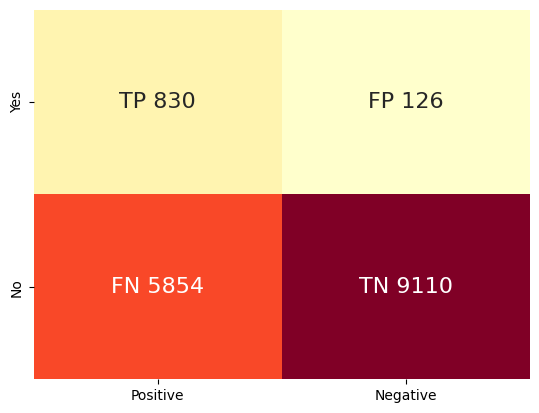

In [77]:
model_evaluation(0.9)

### D) Plot in a bar chart the coefficients of the logistic regression sorted by their contribution to the prediction.

### Interpret the results of the coefficients

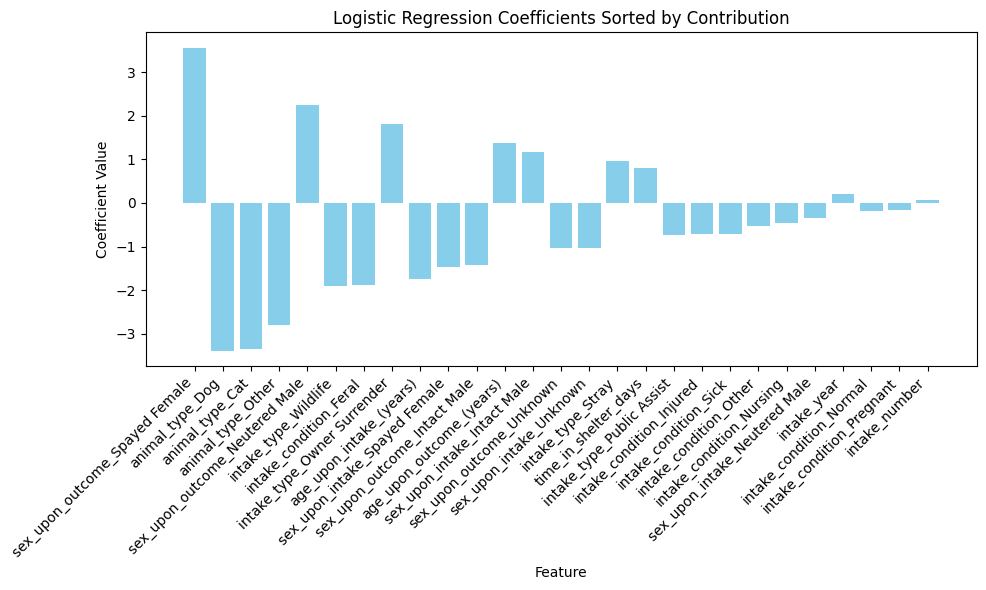

In [ ]:
#show the bartplot here
coefficients = log_reg_model.coef_[0]
feature_names = X_train.columns

# Create a DataFrame pairing each feature with its coefficient
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Add column for absolute value of coefficients and sort by it
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

# Plot the coefficients in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Logistic Regression Coefficients Sorted by Contribution')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

it seems that there is higher log-odds of the postive outcome are observed when the animal is spayed or neutured or surrendered by their owner. However, we see negative coefficients for all the encoded animal, which is slightly weierd. In addition, we see negative coefficients when animal is feral or taken from the wildlife, which also makes sense.